In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date
import seaborn as sns

In [217]:
evds=evdsAPI('dsIC3fiGlu')


In [247]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4588,04-09-2023,26.7264
4589,05-09-2023,26.7831
4590,06-09-2023,26.8087
4591,07-09-2023,26.8183


In [248]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd=usd.head(211)
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-04-30,19.337032
2023-05-31,19.719514
2023-06-30,23.106042


In [252]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


In [253]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]
enf


,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0.5, 1.0, "Turkey's CPI")

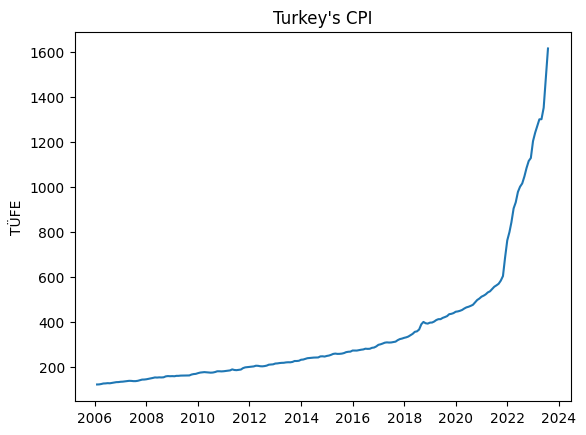

In [254]:
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

enf=enf.set_index(dates)



sns.lineplot(x=enf.index,y=enf["TÜFE"])
plt.title("Turkey's CPI")



In [249]:
usd=pd.DataFrame(usd)
usd.columns=["USD/TL"]

usd["USD/TL"]=usd["USD/TL"].astype(float)
usd

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-04-30,19.337032
2023-05-31,19.719514
2023-06-30,23.106042


In [250]:
dates= pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
usd=usd.set_index(dates)
usd

,USD/TL
2006-02-01,1.326535
2006-03-01,1.335139
2006-04-01,1.337345
2006-05-01,1.420659
2006-06-01,1.600536
...,...
2023-04-01,19.337032
2023-05-01,19.719514
2023-06-01,23.106042
2023-07-01,26.470338


In [200]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202529e+10


In [201]:
#Cleaning the data

money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money["Para Arzi"]=money["Para Arzi"].astype(float)
money


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202529e+10


In [202]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
money=money.set_index(dates)
money["Para Arzi"]=money["Para Arzi"]/1e+08
money

del money["Tarih"]

money


,Para Arzi
2006-02-01,2.423895
2006-03-01,2.494857
2006-04-01,2.521919
2006-05-01,2.751947
2006-06-01,2.791388
...,...
2023-05-01,94.093167
2023-06-01,108.345324
2023-07-01,114.784753
2023-08-01,120.252858


In [203]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4578,21-08-2023,85.44
4579,22-08-2023,84.70
4580,23-08-2023,83.94
4581,24-08-2023,84.07


In [204]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-04-30,84.739474
2023-05-31,75.466000
2023-06-30,74.839091


In [205]:

brent.columns=["Brent"]
brent


,Brent
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-04-30,84.739474
2023-05-31,75.466000
2023-06-30,74.839091


In [207]:

dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)


brent = brent.set_index(dates)
brent

,Brent
2006-02-01,60.210000
2006-03-01,62.064783
2006-04-01,70.260000
2006-05-01,69.776957
2006-06-01,68.555909
...,...
2023-04-01,84.739474
2023-05-01,75.466000
2023-06-01,74.839091
2023-07-01,80.108095


In [208]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [213]:

kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
del kredi["Tarih"]
kredi

,Kredi
2006-02-01,1.381847e-24
2006-03-01,1.481222e-24
2006-04-01,1.527510e-24
2006-05-01,1.664881e-24
2006-06-01,1.740395e-24
...,...
2023-05-01,8.804344e-23
2023-06-01,9.564604e-23
2023-07-01,9.846895e-23
2023-08-01,9.923806e-23


In [214]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

kredi = kredi.set_index(dates)
kredi

,Kredi
2006-02-01,1.381847e-24
2006-03-01,1.481222e-24
2006-04-01,1.527510e-24
2006-05-01,1.664881e-24
2006-06-01,1.740395e-24
...,...
2023-05-01,8.804344e-23
2023-06-01,9.564604e-23
2023-07-01,9.846895e-23
2023-08-01,9.923806e-23


In [215]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
mfaiz['Tarih'] = pd.to_datetime(mfaiz['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
mfaiz.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
mfaiz = mfaiz["TP_TRY_MT02"].resample('M').mean()

# Sonucu görüntüle
mfaiz=pd.DataFrame(mfaiz)
mfaiz.columns=["Mevduat Faizi"]
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
mfaiz=mfaiz.set_index(dates)
mfaiz

,Mevduat Faizi
2006-02-01,15.7600
2006-03-01,15.3300
2006-04-01,15.1750
2006-05-01,14.9250
2006-06-01,15.5840
...,...
2023-05-01,31.4625
2023-06-01,39.5920
2023-07-01,33.1250
2023-08-01,29.4125


In [216]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
kfaiz['Tarih'] = pd.to_datetime(kfaiz['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
kfaiz.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
kfaiz = kfaiz["TP_KTFTUK"].resample('M').mean()

# Sonucu görüntüle
kfaiz=pd.DataFrame(kfaiz)
kfaiz.columns=["Kredi Faizi"]
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kfaiz=kfaiz.set_index(dates)
kfaiz

,Kredi Faizi
2006-02-01,17.2975
2006-03-01,17.0080
2006-04-01,16.2075
2006-05-01,16.3000
2006-06-01,19.6700
...,...
2023-05-01,32.0225
2023-06-01,38.5600
2023-07-01,45.8250
2023-08-01,45.7650


In [255]:

data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=211, freq='M')

# Veriyi bir veri çerçevesine yerleştirme


data["Döviz Kuru"]=usd["USD/TL"]
data["Para Arzı"]=money["Para Arzi"]
data["Petrol"]=brent["Brent"]
data["Kredi Hacmi"]=kredi["Kredi"]
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["TÜFE"]=enf["TÜFE"]
data["Tarih"]=dates
data.set_index(data["Tarih"], inplace=True)
data.dropna(inplace=True)
del data["Tarih"]
data=data.head(211)
data



,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,Kredi Faizi,Mevduat Faizi,TÜFE
Tarih,,,,,,,
2006-02-28,1.326535,2.423895,60.210000,1.381847e-24,17.2975,15.7600,123.84
2006-03-31,1.335139,2.494857,62.064783,1.481222e-24,17.0080,15.3300,124.18
2006-04-30,1.337345,2.521919,70.260000,1.527510e-24,16.2075,15.1750,125.84
2006-05-31,1.420659,2.751947,69.776957,1.664881e-24,16.3000,14.9250,128.20
2006-06-30,1.600536,2.791388,68.555909,1.740395e-24,19.6700,15.5840,128.63
...,...,...,...,...,...,...,...
2023-04-30,19.337032,95.059993,84.739474,8.572114e-23,29.2275,28.3425,1300.04
2023-05-31,19.719514,94.093167,75.466000,8.804344e-23,32.0225,31.4625,1300.60
2023-06-30,23.106042,108.345324,74.839091,9.564604e-23,38.5600,39.5920,1351.59


In [256]:
model = VAR(data)

# Modeli eğitme
model_fitted = model.fit()

# Gelecek aylara dair tahminlerinizi burada yapabilirsiniz
# Örneğin, son gözlem değerlerini alarak tahminlerinizi oluşturabilirsiniz.
last_obs = data.values[-model_fitted.k_ar:]  # Son k_ar gözlemi alın
forecast = model_fitted.forecast(last_obs, steps=12)  # 3 ay için tahmin yapılıyor


c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [257]:
forecast=pd.DataFrame(forecast)
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
forecast=forecast.set_index(dates)
forecast

,0,1,2,3,4,5,6
2023-09-01,28.183957,125.266819,81.752607,1.152046e-22,45.586844,29.922450,1683.959014
2023-10-01,29.362400,130.529453,77.720525,1.203488e-22,45.512522,30.547166,1754.153082
2023-11-01,30.563390,136.068250,73.932829,1.256591e-22,45.579771,31.274037,1825.545699
2023-12-01,31.809896,141.904951,70.385463,1.311542e-22,45.817965,32.090001,1898.827625
2024-01-01,33.119208,148.056422,67.079451,1.368569e-22,46.246126,32.982745,1974.669467
2024-02-01,34.503586,154.535766,64.012975,1.427921e-22,46.872848,33.941550,2053.683554
2024-03-01,35.971106,161.353513,61.177260,1.489849e-22,47.697514,34.957804,2136.402791
2024-04-01,37.526611,168.518761,58.555279,1.554594e-22,48.712235,36.025230,2223.273418
2024-05-01,39.172639,176.040189,56.122326,1.622382e-22,49.904101,37.139880,2314.658288
2024-06-01,40.910282,183.926883,53.847714,1.693420e-22,51.257394,38.299953,2410.847359


In [258]:
dff=pd.concat([enf["TÜFE"].head(211),forecast.iloc[0:,6]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]
dff


,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2024-04-01,2223.273418
2024-05-01,2314.658288
2024-06-01,2410.847359
2024-07-01,2512.072436


In [259]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor
# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)


In [260]:
dff

,CPI,onceki_yil_tufe,yillik_enflasyon_orani
2007-02-01,136.420000,123.84,10.158269
2007-03-01,137.670000,124.18,10.863263
2007-04-01,139.330000,125.84,10.719962
2007-05-01,140.030000,128.20,9.227769
2007-06-01,139.690000,128.63,8.598305
...,...,...,...
2024-04-01,2223.273418,1300.04,71.015770
2024-05-01,2314.658288,1300.60,77.968498
2024-06-01,2410.847359,1351.59,78.371204
2024-07-01,2512.072436,1479.84,69.752976


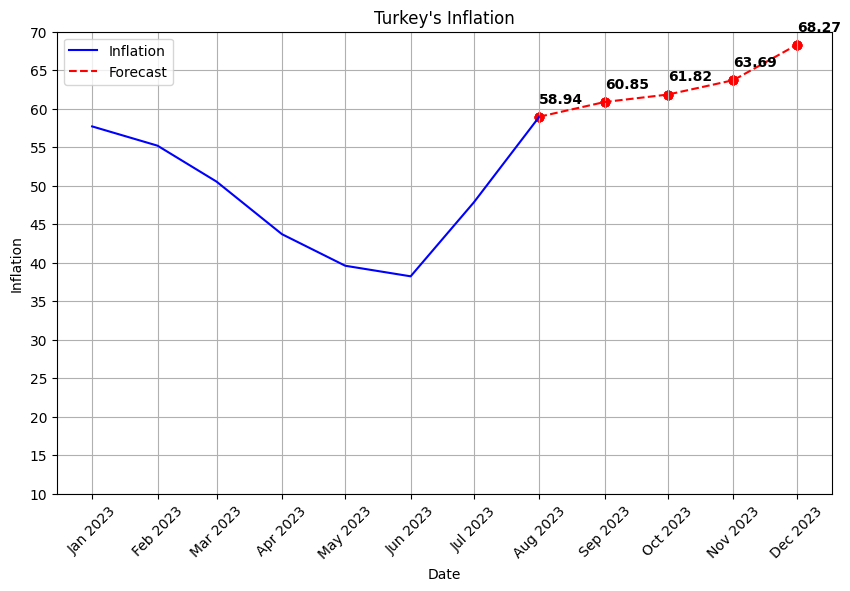

In [261]:
dates=pd.date_range('2008-02-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)






# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:199]["yillik_enflasyon_orani"], label='Inflation', color='blue')
plt.plot(dff.iloc[198:203]["yillik_enflasyon_orani"],label='Forecast', color='red',linestyle="--")





plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:203].index, [t.strftime('%b %Y') for t in dff.iloc[191:203].index], rotation=45)

y_max = int(max(dff["yillik_enflasyon_orani"].iloc[191:203]))
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[198:203]

# Y ekseni etiketlerini ayarlama
for i, v in enumerate(son_dort_veri):
    plt.annotate(f'{v:.2f}', (son_dort_veri.index[i], v), xytext=(0, 10), textcoords='offset points', fontsize=10,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri.index,son_dort_veri,color='red')
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()
